# lady testing tea

Purported to be loosely based on an event in Fisher's life, the experiment is based on a claim by a lady friend of Fisher's that when presented with a cup of tea she could that she could discern whether milk or tea was poured first into her cup. In the experiment the lady is presented with 8 cups of tea, four of which have the milk poured first and four of which have the tea poured first. Fisher's lady friend is then asked to select which cups have the milk poured first. The probability of the lady being able to select the four cups, with milk poured first, correctly is low enough that this outcome would be unlikely. Therefore, if over multiple runs of the experiment if the lady correctly selects the cups with milk poured in first, a statistical unlikelihood, the lady had the ability to discern the order in which tea and milk were poured in the cup.



Problem Statement
Suppose the Lady Tasting Tea experiment is altered to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims that they have the special power of being able to tell if the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

1. Calculate, using Python, the probability that they select the correct six cups.
Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups.

2. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

3. Would you accept two errors? Explain.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import math 

In [2]:
total_no_cups = 12  #total number of cups 
milk_cups = 6 #cups with milk 
tea_cups = 6 #cups with tea first 

In [3]:
# Define the observed successes for both scenarios: milk-first and milk-second
observed_successes_milk_first = [6, 5, 4, 3, 2, 1, 0]
observed_successes_milk_second = [6, 5, 4, 3, 2, 1, 0]


now that we the basic layout for our test I want to create a function to get show the results and store the results in a pandas dataframe 

In [4]:
# Step 3: Define a function to compute results
def compute_results(observed_successes, milk_cups, tea_cups, scenario):
    results = []
    comb_total = math.comb(total_no_cups, milk_cups)  # Total combinations for 6 out of 12 cups

    for success in observed_successes:
        errors_made = milk_cups - success
        
        # Permutations for correct identifications: P(k, k) = k!
        perms_correct = math.factorial(success) if success > 0 else 1
        
        # Probability: calculate 1 / comb_total to find the chance of randomly getting the right cups
        probability = perms_correct / comb_total
        
        # Add results to the list
        results.append({
            'Scenario': scenario,
            'Observed Successes': success,
            'Errors Made': errors_made,
            'Combinations': comb_total,
            'Permutations (Correct)': perms_correct,
            'Probability': probability
        })
    return results


In [5]:
# Step 4: Compute results for both scenarios
results_milk_first = compute_results(observed_successes_milk_first, milk_cups, tea_cups, "Milk First")
results_milk_second = compute_results(observed_successes_milk_second, milk_cups, tea_cups, "Milk Second")

# Combine both scenarios into a single DataFrame
df = pd.DataFrame(results_milk_first + results_milk_second)

# Display the DataFrame
df


,Scenario,Observed Successes,Errors Made,Combinations,Permutations (Correct),Probability
0,Milk First,6,0,924,720,0.779221
1,Milk First,5,1,924,120,0.129870
2,Milk First,4,2,924,24,0.025974
3,Milk First,3,3,924,6,0.006494
4,Milk First,2,4,924,2,0.002165
5,Milk First,1,5,924,1,0.001082
6,Milk First,0,6,924,1,0.001082
7,Milk Second,6,0,924,720,0.779221
8,Milk Second,5,1,924,120,0.129870
9,Milk Second,4,2,924,24,0.025974


when looking at null hypothesis we again need to revisit Fisher, Fisher suggested that a significance level of 0.05 (or 5%) was a reasonable criterion for rejecting the null hypothesis in many cases. His work set the standard for hypothesis testing, and it has been widely adopted ever since so we will use this here. In this task the goal is to assess whether the lady can correctly distinguish the cups. The significance level of 0.05 provides a balance between being too strict (which might overlook her ability) and too lenient (which might falsely suggest she has the ability). If the probability of her success is less than 5%, we conclude that her correct guesses are unlikely to have been due to random chance, and we reject the null hypothesis.

In [6]:
# Null Hypothesis: The lady cannot distinguish between cups with milk first and tea first.
# We reject the null hypothesis if the probability of success is low enough (e.g., below a certain significance level)
significance_level = 0.05 
rejected_null = df[df['Probability']<= significance_level]
if not rejected_null.empty:
    print("Null Hypothesis Rejected: The lady has successfully distinguished between milk-first and tea-first cups.")
else:
    print("Null Hypothesis Not Rejected: The lady has not distinguished between milk-first and tea-first cups.")


Null Hypothesis Rejected: The lady has successfully distinguished between milk-first and tea-first cups.


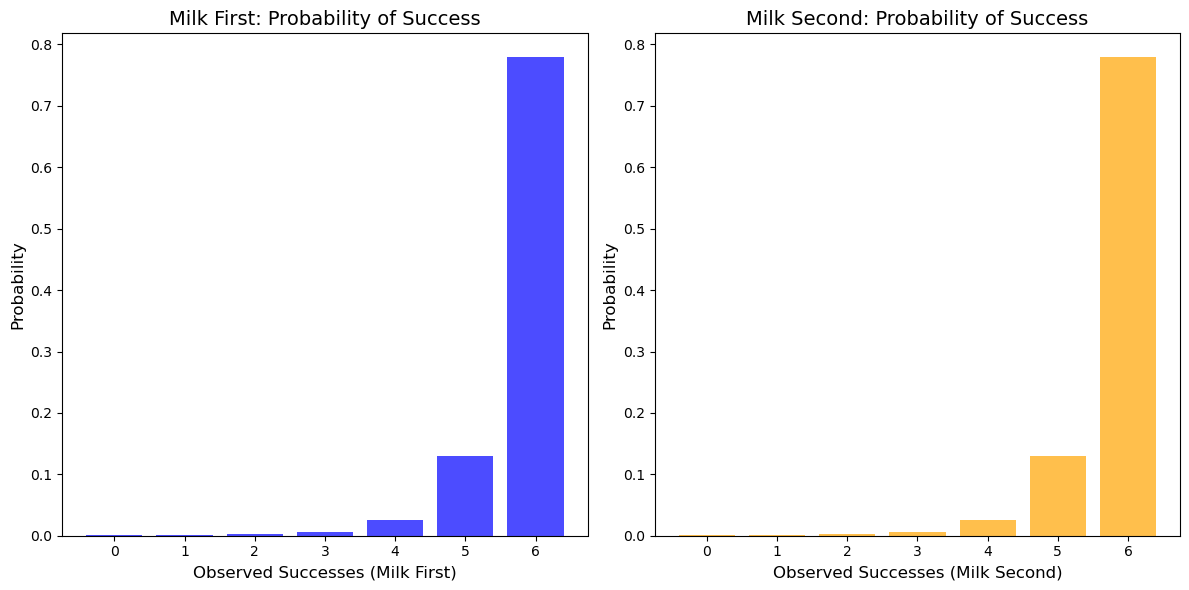

In [7]:
plt.figure(figsize=(12, 6))

# Separate milk-first and milk-second results
df_milk_first = df[df['Scenario'] == "Milk First"]
df_milk_second = df[df['Scenario'] == "Milk Second"]

# Create a subplot for Milk First
plt.subplot(1, 2, 1)
plt.bar(df_milk_first['Observed Successes'], df_milk_first['Probability'], color='blue', alpha=0.7)
plt.xlabel('Observed Successes (Milk First)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Milk First: Probability of Success', fontsize=14)

# Create a subplot for Milk Second
plt.subplot(1, 2, 2)
plt.bar(df_milk_second['Observed Successes'], df_milk_second['Probability'], color='orange', alpha=0.7)
plt.xlabel('Observed Successes (Milk Second)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Milk Second: Probability of Success', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# other possible ways to create this test?? 

When doing this test and sticking to the proposed question. There are many ways to approach this question so I want to quickly explore these. 



Fishers exact test is a statistical test that determines if two category variables have non-random connections or we can say it’s used to check whether two category variables have a significant relationship. (in this case, the lady's guesses and the actual arrangement of cups). It is typically used in situations where you are working with a 2x2 contingency table and want to test for independence between the variables.

In [8]:
from scipy.stats import fisher_exact

# Create the 2x2 contingency table
# [ [Correct Milk-First Guesses, Incorrect Milk-First Guesses], 
#   [Incorrect Tea-First Guesses, Correct Tea-First Guesses] ]
contingency_table = [[6, 0],  # Milk-first: correct guesses (6), incorrect guesses (0)
                     [4, 2]]  # Tea-first: incorrect guesses (4), correct guesses (2)

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table, alternative='two-sided')

# Output the p-value and odds ratio
print(f"Odds Ratio: {odds_ratio}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between the guesses and the actual arrangement.")
else:
    print("Fail to reject the null hypothesis: No significant association between the guesses and the actual arrangement.")


Odds Ratio: inf
P-value: 0.4545454545454546
Fail to reject the null hypothesis: No significant association between the guesses and the actual arrangement.


Another possible way to create this test would be using a binomal test  because it tests whether the proportion of successes (i.e., correct guesses) differs significantly from a hypothesized value. The experiment is fundamentally a binomial process, where each trial (each cup) has one of two possible outcomes: the lady either guesses correctly or incorrectly. Given the binary nature of the outcomes (correct vs. incorrect) and the small sample size, it’s an ideal test to apply in this scenario.

In [9]:
from scipy.stats import binom_test

# Number of correct guesses for milk-first cups
correct_guesses = 6  # Change this to the observed number of correct guesses
total_cups = 6  # Total milk-first cups

# Set the expected probability for the null hypothesis (random guessing)
expected_probability = 0.5  # 50% chance of guessing correctly

# Perform Binomial Test
# We use 'greater' because we are testing if the number of correct guesses is significantly greater than random chance.
p_value = binom_test(correct_guesses, total_cups, expected_probability, alternative='greater')

# Output the p-value
print(f"P-value: {p_value}")

# Interpretation based on p-value
if p_value < 0.05:
    print("We reject the null hypothesis: the result is statistically significant.")
else:
    print("We fail to reject the null hypothesis: the result is not statistically significant.")



P-value: 0.015625
We reject the null hypothesis: the result is statistically significant.


C:\Users\keith\AppData\Local\Temp\ipykernel_18012\1146479267.py:12: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = binom_test(correct_guesses, total_cups, expected_probability, alternative='greater')


# Balancing Type I and Type II Errors:
1. Type I Error (False Positive): Rejecting the null hypothesis when it is actually true. In this case, concluding that the lady can distinguish between the cups when she really can't.
2. Type II Error (False Negative): Failing to reject the null hypothesis when it is false. In this case, not recognizing the lady’s ability to distinguish the cups when she can.

# conclusion 
Using this simple experiment, Fisher established most of the fundamental principles for hypothesis testing, which contributed to major advances across biological and physical sciences.  
The result of 4 out of 6 correct guesses is likely to occur by random chance, so it does not provide strong enough evidence to reject the idea that the lady is simply guessing.
If the lady had made fewer errors (such as 1 or 0 errors), it would have been more statistically significant, and we might reject the null hypothesis.

Summary:
1. Two errors (4 correct guesses) would not be enough to reject the null hypothesis.
2. The probability of making two errors by random chance is too high to conclude that the lady can reliably distinguish between milk-first and tea-first.







------------------------------------------------------------------------------------------------------

# task 2 

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [11]:
mean = 10.0 
std_dev = 3.0 
sample_size = 100000 
sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size)
sample


array([12.76793729,  8.08769222,  9.60975712, ...,  9.88258801,
        4.00123642,  8.67146366])

<Axes: ylabel='Count'>

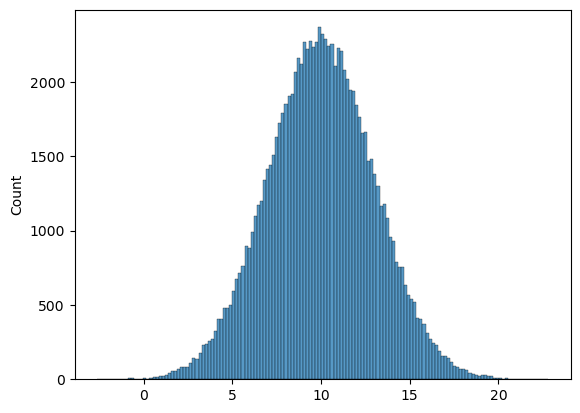

In [12]:
sns.histplot(data=sample)

In [13]:
dist = np.random.normal(10, 3.0,  10000)
dist 

array([11.45699947, 16.33113779,  9.2736624 , ..., 10.69426414,
        9.47139066,  8.43536496])

<Axes: ylabel='Count'>

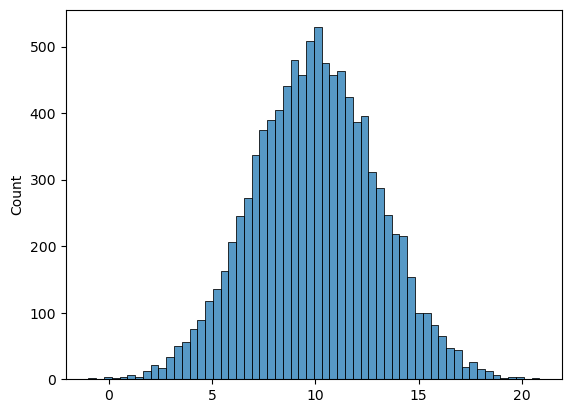

In [14]:
sns.histplot(dist)



-----------------------------------------------------------------------------

In [15]:
np.random.binomial(1, 0.5)

0

In [16]:
filps = np.random.binomial(1, 0.5, 1000)
filps

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,

In [17]:
heads = filps.sum()
heads

498

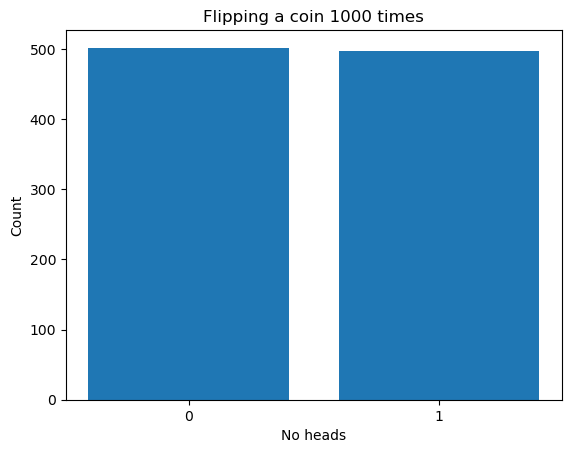

In [18]:
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar([0, 1], [1000 - heads, heads])

# Add x labels.
ax.set_xticks([0, 1])

# Add title.
ax.set_title('Flipping a coin 1000 times')

# Add axis label.
ax.set_xlabel('No heads')
ax.set_ylabel('Count');

In [19]:
twoflips = np.random.binomial(2, 0.5, 1000)

# Show.
twoflips


array([1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 0,
       0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0,
       1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1,
       0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1,
       0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0,
       1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0,
       0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2,

In [20]:
# Count the number of times each value occurs.
uniques, counts = np.unique(twoflips, return_counts=True)

# Show.
uniques, counts

(array([0, 1, 2]), array([259, 466, 275], dtype=int64))

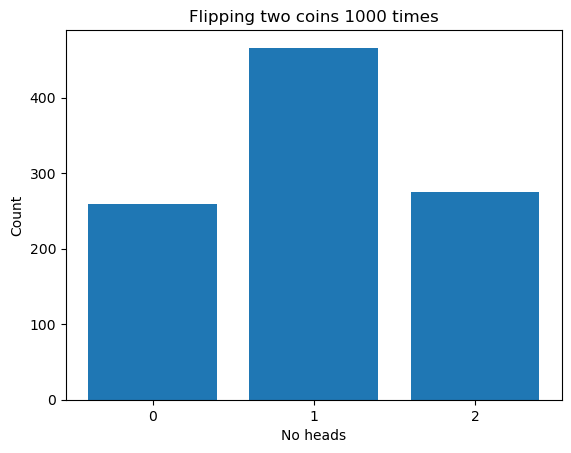

In [21]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar(uniques, counts)

# Set x ticks.
ax.set_xticks(uniques)

# Add title.
ax.set_title('Flipping two coins 1000 times')

# Add axis label.
ax.set_xlabel('No heads')
ax.set_ylabel('Count');

----------------------------------------------------------------------------------

# What is Normal Distribution
The normal distribution was first described in 1809 by Carl Gauss in the context of measurement errors in astronomy. Since then it has been used and applied extensively in relation to probability, statistics and machine learning. It is the default probability for many real-world scenarios and is widely used because many phenomena found in nature fall into this predictable pattern and can be effectively modeled by relatively simple functions.

Normal distributions share the following characteristics:

1. the mean, median and mode are equal The mean is the numerical average of a data set, the mode is the value that appears most frequently and the median is the middle number. In a normal distribution the top of the curve represents all three of these values and they are equal. The mean is often represented by the greek lower case letter µ (mu). The mean is the central tendency of the normal distribution and it defines the location of the peak for the bell curve around which all other values are clustered.

2. it is symmetrical A normal distribution has a distinctive symmetrical bell shape and is often called a bell curve for this reason. This curve can be divided in the middle to produce two equal and symmetrical halves; the right side of the center is a mirror image of the left side.

3. it is unimodal There is only one mode, or peak, in a normal distribution.

4. it is asymptotic Normal distributions are continuous and have tails that are asymptotic. Continuous variables, as opposed to discrete variables which have finite values, can take on an unlimited number of values between the lowest and highest points of measurement. Asymptotic means that the tails of the distribution never intersect with the X axis.

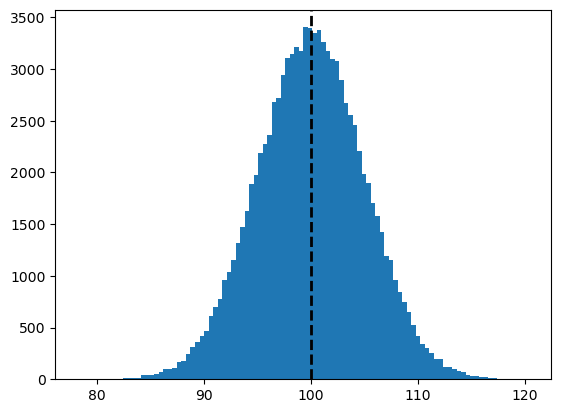

In [22]:
# taken from https://www.geeksforgeeks.org/python-normal-distribution-in-statistics/
# Mean of the distribution 
Mean = 100

# satndard deviation of the distribution
Standard_deviation  = 5
 
# size
size = 100000
 
# creating a normal distribution data
values = np.random.normal(Mean, Standard_deviation, size)
 
# plotting histograph
plt.hist(values, 100)
# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

# starting the task 

In [23]:
n, mu, sigma = 100000, 10.0, 3.0 

In [24]:
sample = np.random.normal(mu, sigma, n)

In [25]:
sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size)
sample

array([ 9.90809021, 11.04617184, 11.57387237, ...,  8.39497514,
       12.30251048, 10.85328871])

Text(0, 0.5, 'Count')

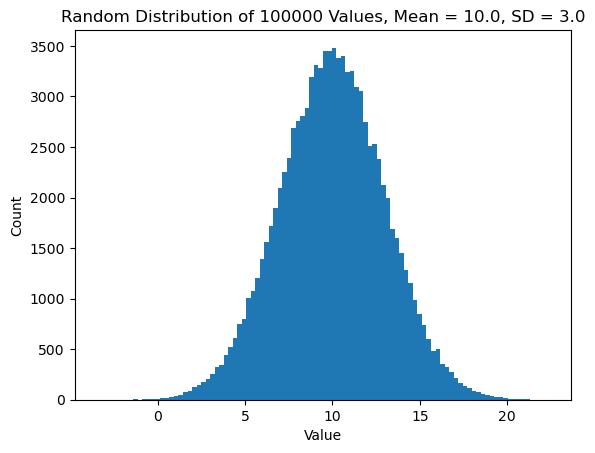

In [26]:
# create a display object
fig, ax = plt.subplots()

# plot histogram of the data
ax.hist(sample, bins=100)
ax.set_title(f'Random Distribution of {n} Values, Mean = {mu}, SD = {sigma}')
ax.set_xlabel('Value')
ax.set_ylabel('Count')

# some stats test will build on this over the coming days

In [47]:
import scipy.stats as st
from scipy.stats import kstest

# The Shapiro wilk test

The Shapiro-Wilk test is a hypothesis test that is applied to a sample with a null hypothesis that the sample has been generated from a normal distribution. If the p-value is low, we can reject such a null hypothesis and say that the sample has not been generated from a normal distribution. It was introduced by Samuel Shapiro and Martin Wilk in 1965 and has since become a standard method for normality testing due to its effectiveness and reliability.

In [48]:
shapiro_test = st.shapiro(sample)
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test Statistic: 0.9999707341194153
p-value: 0.6241210103034973


# Anderson darling test 

The Anderson–Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution. the test assumes that there are no parameters to be estimated in the distribution being tested, in which case the test and its set of critical values is distribution-free. The test is named after Theodore Wilbur Anderson and Donald A. Darling, 

In [49]:
ad_test = st.anderson(sample, dist='norm')
print("anderson dardling Test Statistic:", ad_test.statistic)



anderson dardling Test Statistic: 0.4713567765575135


# the KS test

The Kolmogorov-Smirnov (KS) test is a non-parametric test used to determine if a sample comes from a specific distribution or if two samples come from the same distribution. It is particularly useful for comparing continuous distributions.

In [50]:
ks_stat, p_value = kstest(sample, 'norm', args=(mu, sigma))

# Output the results
print("Kolmogorov-Smirnov Test Statistic:", ks_stat)
print("p-value:", p_value)

# Interpretation
if p_value > 0.05:
    print("The Kolmogorov-Smirnov test suggests no significant deviation from normality.")
else:
    print("The Kolmogorov-Smirnov test suggests a significant deviation from normality.")

Kolmogorov-Smirnov Test Statistic: 0.0018534201356501523
p-value: 0.8814768366794539
The Kolmogorov-Smirnov test suggests no significant deviation from normality.


## qq plot

A Q-Q plot, short for “quantile-quantile” plot, is used to assess whether or not a set of data potentially came from some theoretical distribution.

In most cases, this type of plot is used to determine whether or not a set of data follows a normal distribution.

As a rule of thumb, the more that the points in a Q-Q plot lie on a straight diagonal line, the more normally distributed the data.

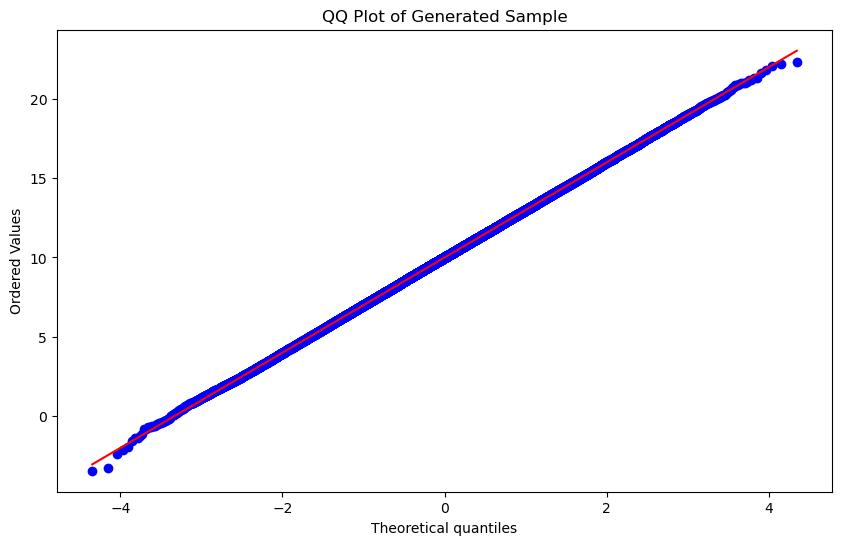

In [51]:
# Generate QQ plot again for clarity
plt.figure(figsize=(10, 6))
st.probplot(sample, dist="norm", plot=plt)
plt.title("QQ Plot of Generated Sample")

# Show the QQ plot
plt.show()

the above plot seems to show that our data is of a normal disturbution 